In [1]:
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd

data = pd.read_csv('netflix.csv', delimiter=',', usecols=[4,9,11])
data
    


,country,listed_in,type
0,South Korea,"International TV Shows, Korean TV Shows, Roman...",TV Show
1,NaN,"Documentaries, International Movies",Movie
2,India,"Comedies, Dramas, International Movies",Movie
3,"France, Senegal, Belgium","Dramas, Independent Movies, International Movies",Movie
4,"Canada, United Kingdom",Kids' TV,TV Show
...,...,...,...
5832,United States,"Cult Movies, Horror Movies",Movie
5833,United States,Horror Movies,Movie
5834,Denmark,"Dramas, International Movies",Movie
5835,United States,Stand-Up Comedy & Talk Shows,TV Show


In [2]:
sorted = data.sort_values(['country', 'listed_in'],na_position='first')
sorted

,country,listed_in,type
253,NaN,"Action & Adventure, Comedies, Independent Movies",Movie
2067,NaN,"Action & Adventure, Comedies, International Mo...",Movie
708,NaN,"Anime Series, Crime TV Shows, International TV...",TV Show
248,NaN,"Anime Series, International TV Shows",TV Show
1037,NaN,"Anime Series, International TV Shows",TV Show
...,...,...,...
4354,Vietnam,"Action & Adventure, Comedies, International Mo...",Movie
535,Vietnam,"Action & Adventure, Dramas, International Movies",Movie
2594,Vietnam,"Comedies, Dramas, International Movies",Movie
2853,Vietnam,"Horror Movies, International Movies, Thrillers",Movie


In [3]:
ignore_nan = sorted.dropna(0)
ignore_nan


,country,listed_in,type
3325,Argentina,"Action & Adventure, Comedies, International Mo...",Movie
5242,Argentina,"Action & Adventure, Horror Movies, Internation...",Movie
109,Argentina,"Children & Family Movies, Music & Musicals",Movie
3092,Argentina,"Comedies, Cult Movies, International Movies",Movie
5139,Argentina,"Comedies, International Movies",Movie
...,...,...,...
4354,Vietnam,"Action & Adventure, Comedies, International Mo...",Movie
535,Vietnam,"Action & Adventure, Dramas, International Movies",Movie
2594,Vietnam,"Comedies, Dramas, International Movies",Movie
2853,Vietnam,"Horror Movies, International Movies, Thrillers",Movie


In [4]:
countries = ignore_nan['country'].value_counts(normalize=True).round(4) * 100
countries

United States                                 35.25
India                                         12.88
United Kingdom                                 6.21
Japan                                          3.11
Canada                                         2.57
                                              ...  
France, Germany                                0.02
Czech Republic, France                         0.02
United States, Israel, Italy, South Africa     0.02
China, Morocco, Hong Kong                      0.02
Denmark, Brazil, France, Portugal, Sweden      0.02
Name: country, Length: 527, dtype: float64

In [5]:
threshold = 6.0

m = countries < threshold
#filter values under threshold
out = countries[~m]
#sum values under and create new values to Series
out['other'] = countries[m].sum()
out


United States     35.25
India             12.88
United Kingdom     6.21
other             46.40
Name: country, dtype: float64

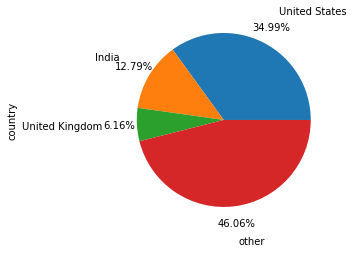

In [6]:
chart = out.plot(kind='pie', subplots=True, autopct = '%1.2f%%', pctdistance=1.2, labeldistance=1.4)
for ax in chart:
    ax.set_aspect('equal')
    ax.yaxis.set_label_coords(-0.45, 0.5)
plt.subplots_adjust(wspace=0.5)
plt.show(chart)

In [7]:
#finding the most popular category/genres on the top 3 countries
top_3_countries = ['United States', 'India', 'United Kingdom']
filtered_data = ignore_nan[ignore_nan['country'].isin(top_3_countries)]
filtered_data
        

,country,listed_in,type
1492,India,"Action & Adventure, Comedies, Dramas",Movie
1522,India,"Action & Adventure, Comedies, Dramas",Movie
1534,India,"Action & Adventure, Comedies, Dramas",Movie
1613,India,"Action & Adventure, Comedies, Dramas",Movie
2162,India,"Action & Adventure, Comedies, Dramas",Movie
...,...,...,...
3875,United States,Thrillers,Movie
3911,United States,Thrillers,Movie
3972,United States,Thrillers,Movie
4772,United States,Thrillers,Movie


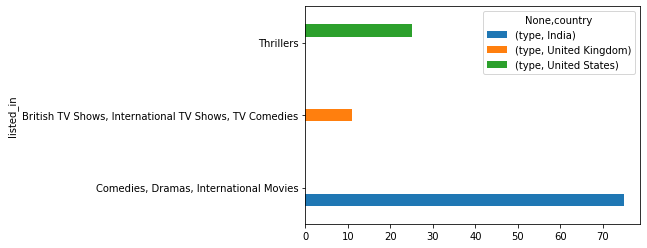

In [8]:
frequency = filtered_data.groupby(['country', 'listed_in']).count().sort_values('country').groupby(level=0).tail(1).unstack(0).plot.barh()
frequency

In [9]:
#finding if netflix has been focusing more on tv shows or movies in recent years
df2 = pd.read_csv('netflix.csv', delimiter=',', usecols=[5,11])
df3 = df2.dropna(0)
df3

,date_added,type
0,"November 30, 2019",TV Show
1,"November 30, 2019",Movie
2,"November 30, 2019",Movie
3,"November 29, 2019",Movie
5,"November 29, 2019",Movie
...,...,...
5832,"November 1, 2010",Movie
5833,"November 18, 2009",Movie
5834,"May 5, 2009",Movie
5835,"February 4, 2008",TV Show


In [13]:
#df3['year_added'] = pd.to_datetime(df3['date_added']).dt.year
df3.loc[:,'year_added'] = pd.to_datetime(df3['date_added']).dt.year
df3

,date_added,type,year_added
0,"November 30, 2019",TV Show,2019
1,"November 30, 2019",Movie,2019
2,"November 30, 2019",Movie,2019
3,"November 29, 2019",Movie,2019
5,"November 29, 2019",Movie,2019
...,...,...,...
5832,"November 1, 2010",Movie,2010
5833,"November 18, 2009",Movie,2009
5834,"May 5, 2009",Movie,2009
5835,"February 4, 2008",TV Show,2008


In [14]:
df4 = df3.drop('date_added', 1)
df4

,type,year_added
0,TV Show,2019
1,Movie,2019
2,Movie,2019
3,Movie,2019
5,Movie,2019
...,...,...
5832,Movie,2010
5833,Movie,2009
5834,Movie,2009
5835,TV Show,2008


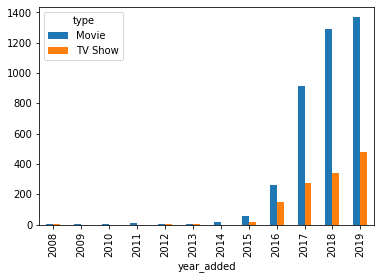

In [21]:
pd.crosstab(df4['year_added'], df4['type']).plot.bar()